In [1]:
import time
import datetime
import json
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_price(stock):
    period1 = int(time.mktime(datetime.datetime(2010,1,1,23,59).timetuple()))
    period2 = int(time.mktime(datetime.datetime(2022,7,12,23,59).timetuple()))
    interval = '1d'
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{stock}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    return query_string

In [3]:
stock = "DOGE-USD"
doge_price = pd.read_csv(get_price(stock))
doge_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
...,...,...,...,...,...,...,...
1703,2022-07-09,0.069224,0.070009,0.068995,0.069512,0.069512,254272147
1704,2022-07-10,0.069509,0.069509,0.066533,0.067263,0.067263,299810124
1705,2022-07-11,0.067268,0.067268,0.061535,0.061847,0.061847,326125900
1706,2022-07-12,0.061851,0.062861,0.060087,0.060087,0.060087,298462083


In [ ]:
stock = "TSLA-USD"
tslaUsd_price = pd.read_csv(get_price(stock))
tslaUsd_price

In [ ]:
stock = "TSLA"
tesla_price = pd.read_csv(get_price(stock))
tesla_price

In [ ]:
stock = "TWTR"
twitter_price = pd.read_csv(get_price(stock))
twitter_price

In [ ]:
stock = "spaceX"
spaceX_price = pd.read_csv(get_price(stock))
spaceX_price

In [ ]:
doge_price.info()

In [ ]:
doge_price.dtypes

In [ ]:
doge_price['Date'] = pd.to_datetime(doge_price['Date'], format='%Y-%m-%d')
twitter_price['Date'] = pd.to_datetime(twitter_price['Date'], format='%Y-%m-%d')
tesla_price['Date'] = pd.to_datetime(tesla_price['Date'], format='%Y-%m-%d')

In [ ]:
doge_price.dtypes

In [ ]:
twitter_price.dtypes

In [ ]:
tesla_price.dtypes

In [ ]:
!pip install fbprophet

# Random Forest

In [4]:
doge_sentiment = pd.read_csv("doge_sentimentA.csv")

In [5]:
doge_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
...,...,...,...,...,...,...,...
1703,2022-07-09,0.069224,0.070009,0.068995,0.069512,0.069512,254272147
1704,2022-07-10,0.069509,0.069509,0.066533,0.067263,0.067263,299810124
1705,2022-07-11,0.067268,0.067268,0.061535,0.061847,0.061847,326125900
1706,2022-07-12,0.061851,0.062861,0.060087,0.060087,0.060087,298462083


In [6]:
doge_sentiment

,Unnamed: 0,Date,Tweet,likes_count,nlikes,nreplies,nretweets,subjectivity,polarity,Sentiment
0,0,2019-04-02,Dogecoin value may vary,NaN,20160.0,1080,1959,0.000,0.000,Neutral
1,1,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,NaN,9063.0,558,2428,0.825,0.300,Positive
2,2,2019-04-02,Dogecoin rulz,NaN,138893.0,1732,16539,0.000,0.000,Neutral
3,3,2020-04-25,Dogecoin Mode,NaN,2192.0,124,207,0.000,0.000,Neutral
4,4,2020-07-18,"Excuse me, I only sell Doge!",NaN,15930.0,416,775,0.525,-0.025,Negative
...,...,...,...,...,...,...,...,...,...,...
63,63,2021-12-14,Tesla will make some merch buyable with Doge &...,363960.0,NaN,49984,53938,0.000,0.000,Neutral
64,64,2021-12-23,That’s why I’m pro Doge,30980.0,NaN,4203,6149,0.000,0.000,Neutral
65,65,2022-01-14,Tesla merch buyable with Dogecoin,332825.0,NaN,38725,51727,0.000,0.000,Neutral
66,66,2022-01-25,I will eat a happy meal on tv if accepts Dogecoin,422498.0,NaN,31009,59390,1.000,0.800,Positive


In [7]:
doge_price = doge_price[["Date","Close","Adj Close"]]
doge_sentiment = doge_sentiment[["Date", "polarity","nreplies","Sentiment"]]


In [8]:
doge_sentiment

,Date,polarity,nreplies,Sentiment
0,2019-04-02,0.000,1080,Neutral
1,2019-04-02,0.300,558,Positive
2,2019-04-02,0.000,1732,Neutral
3,2020-04-25,0.000,124,Neutral
4,2020-07-18,-0.025,416,Negative
...,...,...,...,...
63,2021-12-14,0.000,49984,Neutral
64,2021-12-23,0.000,4203,Neutral
65,2022-01-14,0.000,38725,Neutral
66,2022-01-25,0.800,31009,Positive


In [ ]:
#doge_price.to_csv("doge_price.csv")
#doge_sentiment.to_csv("doge_sentiment.csv")

In [ ]:
#doge_price.set_index(['Date'],inplace=True)

In [ ]:
#doge_sentiment.set_index(['Date'], inplace=True)

In [9]:

df_merge = doge_price.merge(doge_sentiment, on='Date')


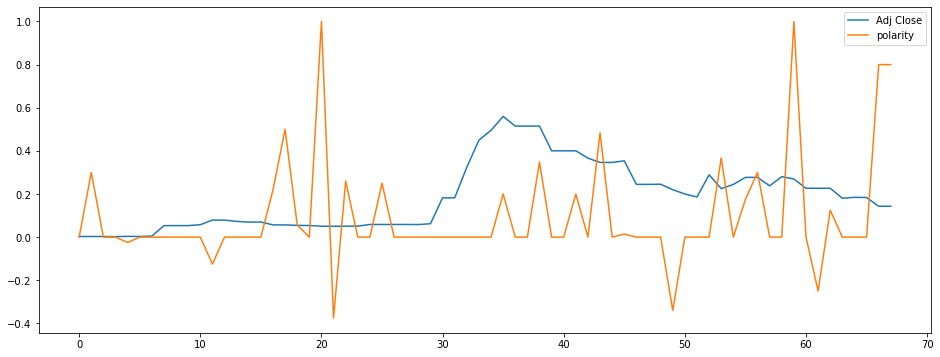

In [10]:
plt = df_merge[["Adj Close","polarity"]].plot(figsize=(16,6))

In [11]:
df_merge_polarity = df_merge[df_merge["polarity"] != 0.0]
df_merge_polarity

,Date,Close,Adj Close,polarity,nreplies,Sentiment
1,2019-04-02,0.002795,0.002795,0.300000,558,Positive
4,2020-07-18,0.003473,0.003473,-0.025000,416,Negative
11,2021-02-08,0.078825,0.078825,-0.125000,1123,Negative
16,2021-02-15,0.056591,0.056591,0.218750,27269,Positive
17,2021-02-15,0.056591,0.056591,0.500000,447,Positive
18,2021-02-20,0.054384,0.054384,0.056250,2877,Positive
20,2021-03-01,0.050599,0.050599,1.000000,9010,Positive
21,2021-03-02,0.050262,0.050262,-0.375000,891,Negative
22,2021-03-03,0.050592,0.050592,0.260000,702,Positive
25,2021-03-14,0.058592,0.058592,0.250000,2365,Positive


2019-04-02
2020-07-18
2021-02-08
2021-02-15
2021-02-15
2021-02-20
2021-03-01
2021-03-02
2021-03-03
2021-03-14
2021-05-14
2021-05-16
2021-05-20
2021-05-25
2021-05-26
2021-07-09
2021-09-23
2021-10-24
2021-10-24
2021-11-03
2021-11-23
2021-11-23
2022-01-25
2022-01-25


C:\Users\15125\AppData\Local\Temp/ipykernel_53696/430168566.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_merge.Date, rotation=45)


[Text(0, 0, '2019-04-02'),
 Text(1, 0, '2019-04-02'),
 Text(2, 0, '2019-04-02'),
 Text(3, 0, '2020-04-25'),
 Text(4, 0, '2020-07-18'),
 Text(5, 0, '2020-11-17'),
 Text(6, 0, '2020-12-20'),
 Text(7, 0, '2021-02-04'),
 Text(8, 0, '2021-02-04'),
 Text(9, 0, '2021-02-04'),
 Text(10, 0, '2021-02-06'),
 Text(11, 0, '2021-02-08'),
 Text(12, 0, '2021-02-08'),
 Text(13, 0, '2021-02-10'),
 Text(14, 0, '2021-02-11'),
 Text(15, 0, '2021-02-12'),
 Text(16, 0, '2021-02-15'),
 Text(17, 0, '2021-02-15'),
 Text(18, 0, '2021-02-20'),
 Text(19, 0, '2021-02-22')]

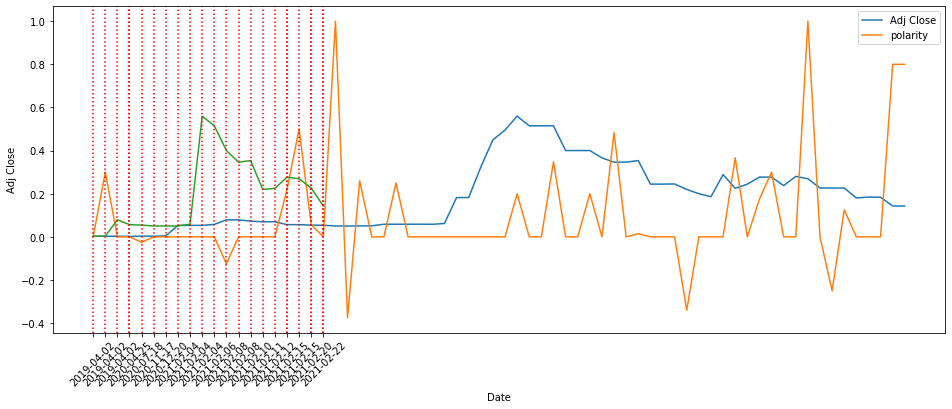

In [12]:
import datetime


plt = df_merge[["Adj Close","polarity"]].plot(figsize=(16,6))
ax = sns.lineplot(x=df_merge_polarity['Date'], y=df_merge_polarity["Adj Close"])
for i in df_merge_polarity.Date:
    x = i
    print(i)
    plt.axvline(x,color='r',ls=':')

ax.set_xticklabels(df_merge.Date, rotation=45)
#ax.set_xticks(df_merge.Date) 
#ax.set_title("Dogecoin 2020")

In [13]:
df_merge.set_index("Date", inplace=True)

In [14]:
df_merge

,Close,Adj Close,polarity,nreplies,Sentiment
Date,,,,,
2019-04-02,0.002795,0.002795,0.000,1080,Neutral
2019-04-02,0.002795,0.002795,0.300,558,Positive
2019-04-02,0.002795,0.002795,0.000,1732,Neutral
2020-04-25,0.002142,0.002142,0.000,124,Neutral
2020-07-18,0.003473,0.003473,-0.025,416,Negative
...,...,...,...,...,...
2021-12-14,0.180157,0.180157,0.000,49984,Neutral
2021-12-23,0.184490,0.184490,0.000,4203,Neutral
2022-01-14,0.183549,0.183549,0.000,38725,Neutral


<AxesSubplot:xlabel='Date'>

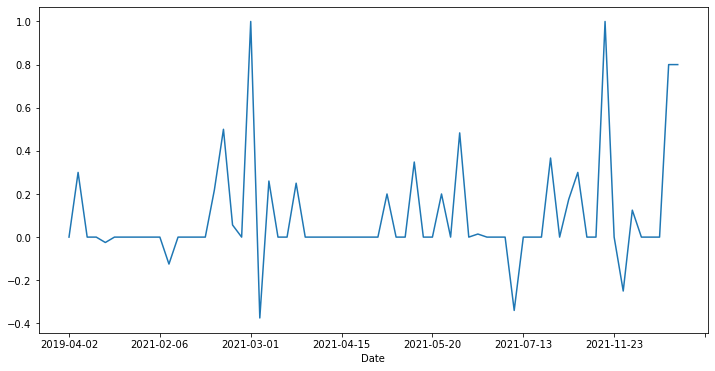

In [15]:
df_merge["polarity"].plot(figsize=(12,6))

In [17]:
df_merge["Sentiment"].value_counts()

Neutral     44
Positive    19
Negative     5
Name: Sentiment, dtype: int64

In [19]:
df_merge["Price Difference"] = df_merge["Adj Close"].diff()

In [20]:
df_merge.dropna(inplace=True)

In [ ]:
import numpy
#df_merge["Stock Trend"] = numpy.where(df_merge["Price Difference"]>0,1,0)

In [24]:
#new_df = df_merge[["Adj Close","nreplies","Sentiment","Stock Trend"]]
new_df = df_merge[["Adj Close","nreplies","Sentiment"]]

In [25]:
new_df = pd.get_dummies(new_df, columns=["Sentiment"])

In [26]:
new_df

,Adj Close,nreplies,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
Date,,,,,
2019-04-02,0.002795,558,0,0,1
2019-04-02,0.002795,1732,0,1,0
2020-04-25,0.002142,124,0,1,0
2020-07-18,0.003473,416,1,0,0
2020-11-17,0.002936,81,0,1,0
...,...,...,...,...,...
2021-12-14,0.180157,49984,0,1,0
2021-12-23,0.184490,4203,0,1,0
2022-01-14,0.183549,38725,0,1,0


In [247]:
X = new_df.copy()
#X.drop("Stock Trend", axis=1,inplace=True)
X.drop("Adj Close", axis=1,inplace=True)

In [257]:
X

,nreplies,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
Date,,,,
2019-04-02,558,0,0,1
2019-04-02,1732,0,1,0
2020-04-25,124,0,1,0
2020-07-18,416,1,0,0
2020-11-17,81,0,1,0
...,...,...,...,...
2021-12-14,49984,0,1,0
2021-12-23,4203,0,1,0
2022-01-14,38725,0,1,0


In [249]:
#y=new_df["Stock Trend"].values.reshape(-1,1)
y=new_df["Adj Close"].values.reshape(-1,1)

In [144]:
SPLIT = int(0.6 * len(X))
X_train = X[:SPLIT]
X_test = X[SPLIT:]

y_train = y[:SPLIT]
y_test = y[SPLIT:]

In [145]:
from sklearn.preprocessing import StandardScaler


In [146]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [147]:
len(y_test)

27

# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [36]:
rfc = RandomForestClassifier(n_estimators=128, random_state=78) 
rfc.fit(X_train, y_train)

C:\Users\15125\AppData\Local\Temp/ipykernel_53696/1859614513.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


ValueError: Unknown label type: 'continuous'

In [ ]:
rfC_model = rfc.fit(X_train_scaled, y_train)

In [ ]:
predictions = rfC_model.predict(X_test_scaled)

In [ ]:
predictions

In [ ]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

In [ ]:
acc_score = accuracy_score(y_test, predictions)
acc_score

In [ ]:
pd.DataFrame(y_test,predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

In [ ]:
plt.plot(y_test,label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()

# Random Forest Regressor

In [148]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=128, random_state=78) 
rfr.fit(X_train, y_train)

C:\Users\15125\AppData\Local\Temp/ipykernel_53696/4171947849.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor(n_estimators=128, random_state=78)

In [133]:
rfr_model = rfr.fit(X_train_scaled, y_train)

In [134]:
predictions_reg = rfr_model.predict(X_test_scaled)

In [135]:
predictions_reg

array([0.50998979, 0.0814874 , 0.12035359, 0.38241899, 0.30994472,
       0.35587385, 0.14012857, 0.06431136, 0.14626808, 0.0543117 ,
       0.18653761, 0.18109316, 0.07118499, 0.16254734, 0.31226981,
       0.34866379, 0.09005471, 0.0745513 , 0.31527273, 0.06435922,
       0.36707001, 0.07675691, 0.35758698, 0.42633439, 0.32461048,
       0.12083291, 0.12083291])

In [41]:
import numpy as np

In [50]:
len(y_test)

27

In [45]:
#X["Adj Close"]

In [142]:
y_test

Date
2021-05-20    0.400194
2021-05-24    0.366162
2021-05-25    0.346302
2021-05-25    0.346302
2021-05-26    0.353693
2021-07-01    0.244549
2021-07-01    0.244549
2021-07-02    0.245264
2021-07-09    0.219864
2021-07-13    0.200003
2021-07-17    0.186125
2021-08-24    0.288739
2021-09-23    0.224832
2021-10-22    0.244221
2021-10-24    0.277048
2021-10-24    0.277048
2021-10-27    0.237690
2021-10-31    0.280244
2021-11-03    0.269407
2021-11-23    0.226512
2021-11-23    0.226512
2021-11-23    0.226512
2021-12-14    0.180157
2021-12-23    0.184490
2022-01-14    0.183549
2022-01-25    0.143049
2022-01-25    0.143049
Name: Adj Close, dtype: float64

In [49]:
len(X_test_scaled)

27

In [141]:
X_test.index.array.to_numpy()

array(['2021-05-20', '2021-05-24', '2021-05-25', '2021-05-25',
       '2021-05-26', '2021-07-01', '2021-07-01', '2021-07-02',
       '2021-07-09', '2021-07-13', '2021-07-17', '2021-08-24',
       '2021-09-23', '2021-10-22', '2021-10-24', '2021-10-24',
       '2021-10-27', '2021-10-31', '2021-11-03', '2021-11-23',
       '2021-11-23', '2021-11-23', '2021-12-14', '2021-12-23',
       '2022-01-14', '2022-01-25', '2022-01-25'], dtype=object)

In [149]:
df_x = pd.DataFrame(X_test.index.array.to_numpy())
df_x.columns = ['Date']
df_y = pd.DataFrame(y_test)
df_y.columns = ['y_test']
df_pred =pd.DataFrame(predictions_reg)
df_pred.columns = ["y predicted"]
df_plot = pd.concat([df_x,df_y,df_pred],axis=1)
df_plot.set_index("Date",inplace=True)

In [137]:
df_plot

,y_test,y predicted
Date,,
2021-05-20,0.400194,0.509990
2021-05-24,0.366162,0.081487
2021-05-25,0.346302,0.120354
2021-05-25,0.346302,0.382419
2021-05-26,0.353693,0.309945
2021-07-01,0.244549,0.355874
2021-07-01,0.244549,0.140129
2021-07-02,0.245264,0.064311
2021-07-09,0.219864,0.146268


<AxesSubplot:xlabel='Date'>

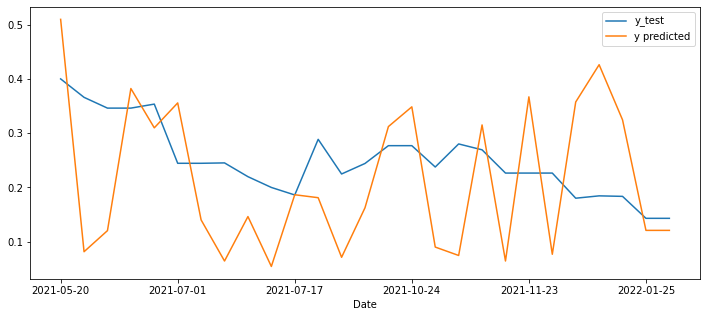

In [150]:
df_plot.plot(figsize=(12,5))

In [114]:

df_x

,Date
0,2021-05-20
1,2021-05-24
2,2021-05-25
3,2021-05-25
4,2021-05-26
5,2021-07-01
6,2021-07-01
7,2021-07-02
8,2021-07-09
9,2021-07-13


In [ ]:
https://stackoverflow.com/questions/70629022/random-forest-regressor-for-multivariate-input-and-output

# TensorFlow

In [ ]:
import sklearn as skl
import tensorflow as tf

In [ ]:
X=df_merge
y=pd.DataFrame(df_merge["Close"])


In [ ]:
X

In [ ]:
y

In [ ]:

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["polarity","Stock Trend"])
df["Target"] = y

In [ ]:
X=df
X

In [ ]:
df.plot.scatter(x="polarity", y="Stock Trend", c="Target", colormap="winter")

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.6, random_state=78)

In [242]:
X_train

,polarity
Date,
2021-05-24,0.000000
2021-05-26,0.014286
2021-03-03,0.260000
2021-11-23,0.000000
2021-03-14,0.000000
2021-10-22,0.000000
2021-03-14,0.250000
2021-05-20,0.000000
2021-07-02,0.000000


In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=6, input_shape=(X_train.shape[1],), activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, input_shape=(X_train.shape[1],), activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=1000)

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Linear Regression

In [151]:
from sklearn.linear_model import LinearRegression
import pandas_ta

In [243]:
df_merge

,Close,Adj Close,polarity,nreplies,Sentiment,Price Difference,EMA_10
Date,,,,,,,
2021-02-06,0.057595,0.057595,0.000000,403,Neutral,0.004306,0.023623
2021-02-08,0.078825,0.078825,-0.125000,1123,Negative,0.021230,0.033660
2021-02-08,0.078825,0.078825,0.000000,25822,Neutral,0.000000,0.041871
2021-02-10,0.072896,0.072896,0.000000,27411,Neutral,-0.005929,0.047512
2021-02-11,0.069676,0.069676,0.000000,18772,Neutral,-0.003220,0.051542
2021-02-12,0.070069,0.070069,0.000000,2092,Neutral,0.000393,0.054911
2021-02-15,0.056591,0.056591,0.218750,27269,Positive,-0.013478,0.055216
2021-02-15,0.056591,0.056591,0.500000,447,Positive,0.000000,0.055466
2021-02-20,0.054384,0.054384,0.056250,2877,Positive,-0.002207,0.055269


(67,)
<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 2019-04-02 to 2022-01-25
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             67 non-null     float64
 1   Adj Close         67 non-null     float64
 2   polarity          67 non-null     float64
 3   nreplies          67 non-null     int64  
 4   Sentiment         67 non-null     object 
 5   Price Difference  67 non-null     float64
 6   EMA_10            58 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.2+ KB
None


<AxesSubplot:xlabel='Date'>

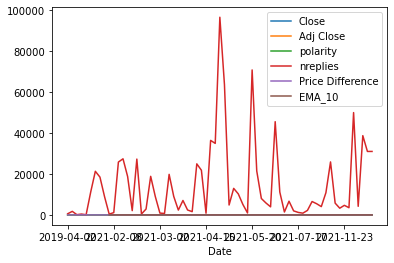

In [156]:
print(df_merge["Adj Close"].shape)
print(df_merge.info())
df_merge.plot()

In [166]:
df_reg = df_merge[["Adj Close","polarity"]]
df_reg.ta.ema(close='Adj Close', length=10, append=True)
df_reg

C:\Users\15125\AppData\Local\Temp/ipykernel_53696/914109876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg.ta.ema(close='Adj Close', length=10, append=True)


,Adj Close,polarity,EMA_10
Date,,,
2021-02-06,0.057595,0.000000,NaN
2021-02-08,0.078825,-0.125000,NaN
2021-02-08,0.078825,0.000000,NaN
2021-02-10,0.072896,0.000000,NaN
2021-02-11,0.069676,0.000000,NaN
2021-02-12,0.070069,0.000000,NaN
2021-02-15,0.056591,0.218750,NaN
2021-02-15,0.056591,0.500000,NaN
2021-02-20,0.054384,0.056250,NaN


In [169]:
df_reg.dropna(inplace=True)

C:\Users\15125\AppData\Local\Temp/ipykernel_53696/3286650934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg.dropna(inplace=True)


<AxesSubplot:xlabel='Date'>

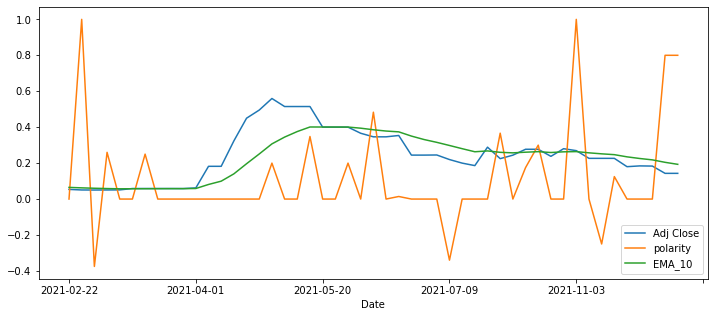

In [170]:
df_reg.plot(figsize=(12,5))

In [171]:
 from sklearn.model_selection import train_test_split

In [212]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df_reg[['Adj Close']], df_reg[['EMA_10']], test_size=.2)
# Test set
print(X_test.describe())

       Adj Close
count  10.000000
mean    0.226325
std     0.142288
min     0.050984
25%     0.182207
50%     0.185308
75%     0.264414
max     0.514895


In [213]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [214]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.62629259]]
Mean Absolute Error: 0.05522045378342368
Coefficient of Determination: 0.7201579541260023


In [215]:
y_test

,EMA_10
Date,
2021-04-15,0.081162
2021-12-23,0.225738
2021-04-15,0.099534
2021-11-23,0.251639
2021-03-14,0.057744
2021-05-20,0.400886
2021-07-17,0.263194
2021-10-24,0.260765
2021-03-06,0.057044


In [216]:
dfpred = pd.DataFrame(y_pred)
dfpred.columns=["y_pred"]
dfpred

,y_pred
0,0.196943
1,0.198373
2,0.196943
3,0.224691
4,0.119524
5,0.333467
6,0.199397
7,0.256342
8,0.114760
9,0.405304


In [217]:
dfpred["y_pred"]

0    0.196943
1    0.198373
2    0.196943
3    0.224691
4    0.119524
5    0.333467
6    0.199397
7    0.256342
8    0.114760
9    0.405304
Name: y_pred, dtype: float64

In [218]:
df_adjClose = y_test.copy()
df_adjClose["y_pred"]=y_pred
df_adjClose


,EMA_10,y_pred
Date,,
2021-04-15,0.081162,0.196943
2021-12-23,0.225738,0.198373
2021-04-15,0.099534,0.196943
2021-11-23,0.251639,0.224691
2021-03-14,0.057744,0.119524
2021-05-20,0.400886,0.333467
2021-07-17,0.263194,0.199397
2021-10-24,0.260765,0.256342
2021-03-06,0.057044,0.114760


<AxesSubplot:xlabel='Date'>

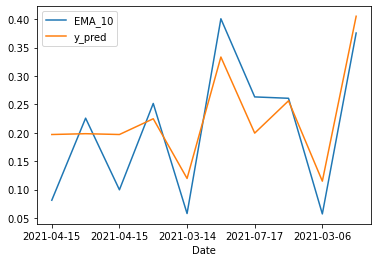

In [219]:
df_adjClose.plot()

In [220]:
df_reg_polarity = df_merge[["Adj Close","polarity"]]
df_reg_polarity.ta.ema(close='polarity', length=10, append=True)
df_reg_polarity.dropna(inplace=True)
df_reg_polarity

C:\Users\15125\AppData\Local\Temp/ipykernel_53696/1092951235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_polarity.ta.ema(close='polarity', length=10, append=True)
C:\Users\15125\AppData\Local\Temp/ipykernel_53696/1092951235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_polarity.dropna(inplace=True)


,Adj Close,polarity,EMA_10
Date,,,
2021-02-22,0.053725,0.000000,0.065000
2021-03-01,0.050599,1.000000,0.235000
2021-03-02,0.050262,-0.375000,0.124091
2021-03-03,0.050592,0.260000,0.148802
2021-03-06,0.050984,0.000000,0.121747
2021-03-14,0.058592,0.000000,0.099611
2021-03-14,0.058592,0.250000,0.126954
2021-03-14,0.058592,0.000000,0.103872
2021-03-16,0.058607,0.000000,0.084986


In [221]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df_reg_polarity[['polarity']], df_reg_polarity[['EMA_10']], test_size=.2)
# Test set
print(X_test.describe())

        polarity
count  10.000000
mean    0.181429
std     0.331837
min     0.000000
25%     0.000000
50%     0.000000
75%     0.153571
max     0.800000


In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [223]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.13844497]]
Mean Absolute Error: 0.045555396762344755
Coefficient of Determination: 0.5293510961368243


In [224]:
dfpred1 = pd.DataFrame(y_pred)
dfpred1.columns=["y_pred"]
dfpred1

,y_pred
0,0.068926
1,0.068926
2,0.179682
3,0.068926
4,0.068926
5,0.179682
6,0.068926
7,0.096615
8,0.070904
9,0.068926


In [225]:
df_polarity = y_test.copy()
df_polarity["y_pred"]=y_pred
df_polarity

,EMA_10,y_pred
Date,,
2021-12-14,0.097371,0.068926
2021-10-27,0.092427,0.068926
2022-01-25,0.308097,0.179682
2021-05-25,0.119585,0.068926
2021-03-06,0.121747,0.068926
2022-01-25,0.198785,0.179682
2021-04-15,0.038084,0.068926
2021-05-20,0.087062,0.096615
2021-05-26,0.100440,0.070904


<AxesSubplot:xlabel='Date'>

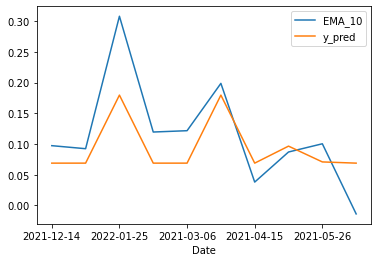

In [226]:
df_polarity.plot()

In [232]:
import numpy
df_reg["Price Difference"] = df_reg["Adj Close"].diff()
df_reg["Stock Trend"] = numpy.where(df_reg["Price Difference"]>0,1,0)

C:\Users\15125\AppData\Local\Temp/ipykernel_53696/1255490336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg["Price Difference"] = df_reg["Adj Close"].diff()
C:\Users\15125\AppData\Local\Temp/ipykernel_53696/1255490336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg["Stock Trend"] = numpy.where(df_reg["Price Difference"]>0,1,0)


In [234]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df_reg[['polarity']], df_reg[['Stock Trend']], test_size=.2)
# Test set
print(X_test.describe())

        polarity
count  10.000000
mean    0.100815
std     0.300956
min    -0.340000
25%     0.000000
50%     0.000000
75%     0.150000
max     0.800000


In [233]:
df_reg

,Adj Close,polarity,EMA_10,Price Difference,Stock Trend
Date,,,,,
2021-02-22,0.053725,0.000000,0.064918,NaN,0
2021-03-01,0.050599,1.000000,0.062314,-0.003126,0
2021-03-02,0.050262,-0.375000,0.060123,-0.000337,0
2021-03-03,0.050592,0.260000,0.058390,0.000330,1
2021-03-06,0.050984,0.000000,0.057044,0.000392,1
2021-03-14,0.058592,0.000000,0.057325,0.007608,1
2021-03-14,0.058592,0.250000,0.057555,0.000000,0
2021-03-14,0.058592,0.000000,0.057744,0.000000,0
2021-03-16,0.058607,0.000000,0.057901,0.000015,1


In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [241]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Model of intercept:",model.intercept_)

Model Coefficients: [[-0.36666856]]
Mean Absolute Error: 0.4376472356993421
Coefficient of Determination: -0.03525413908251229
Model of intercept: [0.39986529]


In [237]:
dfpred2 = pd.DataFrame(y_pred)
dfpred2.columns=["y_pred"]
dfpred2

,y_pred
0,0.326532
1,0.272210
2,0.399865
3,0.106530
4,0.399865
5,0.399865
6,0.399865
7,0.524533
8,0.399865
9,0.399865


In [238]:
df_trend = y_test.copy()
df_trend["y_pred"]=y_pred
df_trend

,Stock Trend,y_pred
Date,,
2021-05-14,1,0.326532
2021-05-16,0,0.272210
2021-03-16,1,0.399865
2022-01-25,0,0.106530
2021-07-17,0,0.399865
2021-10-31,1,0.399865
2021-04-15,0,0.399865
2021-07-09,0,0.524533
2021-05-16,0,0.399865


<AxesSubplot:xlabel='Date'>

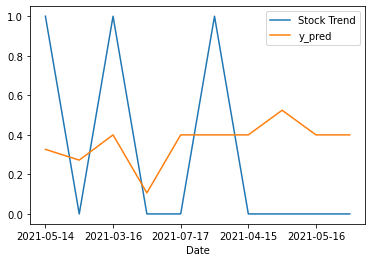

In [239]:
df_trend.plot()

In [264]:
X_multivarite = df_merge.copy()

In [278]:
X_multivarite

,Close,polarity,nreplies
Date,,,
2021-02-06,0.057595,0.000000,403
2021-02-08,0.078825,-0.125000,1123
2021-02-08,0.078825,0.000000,25822
2021-02-10,0.072896,0.000000,27411
2021-02-11,0.069676,0.000000,18772
2021-02-12,0.070069,0.000000,2092
2021-02-15,0.056591,0.218750,27269
2021-02-15,0.056591,0.500000,447
2021-02-20,0.054384,0.056250,2877


In [275]:
y_multivarite = X_multivarite["Adj Close"].values.reshape(-1,1)


In [277]:

X_multivarite.drop("Adj Close",inplace=True, axis=1)

In [276]:
y_multivarite

array([[0.057595],
       [0.078825],
       [0.078825],
       [0.072896],
       [0.069676],
       [0.070069],
       [0.056591],
       [0.056591],
       [0.054384],
       [0.053725],
       [0.050599],
       [0.050262],
       [0.050592],
       [0.050984],
       [0.058592],
       [0.058592],
       [0.058592],
       [0.058607],
       [0.058328],
       [0.061986],
       [0.182207],
       [0.182207],
       [0.323682],
       [0.449964],
       [0.495231],
       [0.559604],
       [0.514895],
       [0.514895],
       [0.514895],
       [0.400194],
       [0.400194],
       [0.400194],
       [0.366162],
       [0.346302],
       [0.346302],
       [0.353693],
       [0.244549],
       [0.244549],
       [0.245264],
       [0.219864],
       [0.200003],
       [0.186125],
       [0.288739],
       [0.224832],
       [0.244221],
       [0.277048],
       [0.277048],
       [0.23769 ],
       [0.280244],
       [0.269407],
       [0.226512],
       [0.226512],
       [0.22

In [284]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_multivarite,y_multivarite, test_size=.2,random_state=40)
# Test set
print(X_test.describe())

           Close   polarity      nreplies
count  12.000000  12.000000     12.000000
mean    0.235039   0.147917  15952.666667
std     0.129376   0.263047  27259.911947
min     0.057595   0.000000    403.000000
25%     0.172418   0.000000   1783.000000
50%     0.212417   0.000000   4299.000000
75%     0.303130   0.185417  19533.500000
max     0.495231   0.800000  96563.000000


In [279]:
# Create the model by using LinearRegression.

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [285]:
model.fit(X_train,y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 1.0


In [286]:
# Use model to make predictions
y_pred = model.predict(X_test)

In [287]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Model of intercept:",model.intercept_)

Model Coefficients: [[1.00000000e+00 8.17984845e-18 2.01369987e-21]]
Mean Absolute Error: 1.1391350825581034e-16
Coefficient of Determination: 1.0
Model of intercept: [1.94289029e-16]


In [290]:
import matplotlib.pyplot as plt 

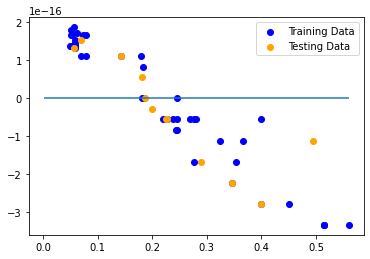

In [291]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())

plt.show()

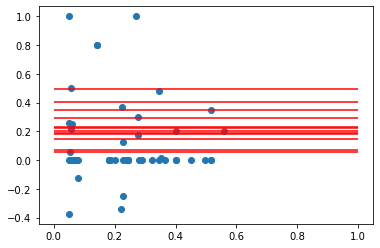

In [304]:
plt.scatter( y_multivarite,X_multivarite.polarity)
plt.hlines(y_pred,xmin=0,xmax=1,colors='r')
plt.show()

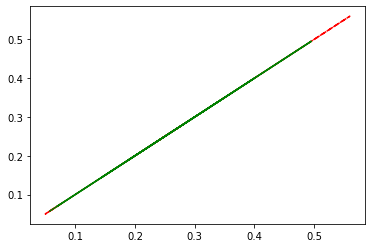

In [311]:
plt.plot( y_multivarite,X_multivarite.Close,'r--',y_test,y_pred,'g')

plt.show()